In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.special import gamma

plt.style.use('ggplot')

In [2]:
# https://artmenlope.github.io/plotting-complex-variable-functions/

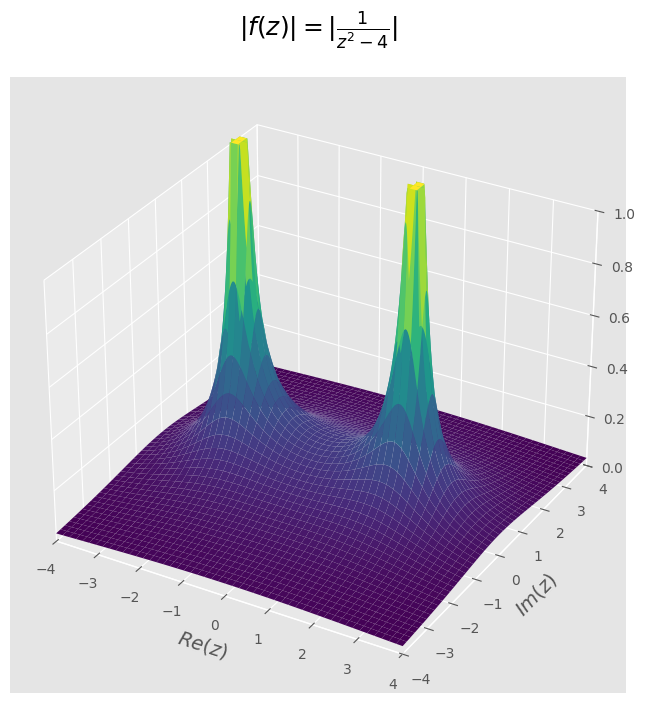

In [17]:
N = 500
lim = 4

x, y = np.meshgrid(np.linspace(-lim, lim, N),
                   np.linspace(-lim, lim, N))
z = x + 1j*y
f = abs(1/(z**2 - 4))
f[f > 1.3] = 1.3 # Cut the function at the poles for decoration purposes.

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', xlim=(-lim, lim), ylim=(-lim, lim), zlim=(0, 1))

ax.plot_surface(x, y, f, cmap='viridis', shade=True, alpha=1)
ax.set_xlabel(r'$Re(z)$', size=14)
ax.set_ylabel(r'$Im(z)$', size=14)
ax.set_title(r'$|f(z)|=|\frac{1}{z^2-4}|$', size=18, pad=30);


<>:10: SyntaxWarning: invalid escape sequence '\G'
<>:10: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-1928750795.py:10: SyntaxWarning: invalid escape sequence '\G'
  ax.set_title("$|f(z)|=|\Gamma (z)|$", size=18, pad=30)


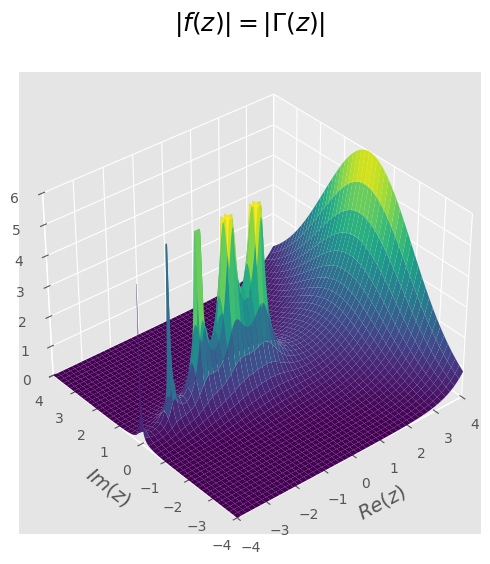

In [ ]:
f = abs(gamma(z))
f[f>6] = 6

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim), zlim=(0,6))

ax.plot_surface(x, y, f, cmap="viridis", shade=True, alpha=1)
ax.set_xlabel("$Re(z)$", size=14)
ax.set_ylabel("$Im(z)$", size=14)
ax.set_title("$|f(z)|=|\Gamma (z)|$", size=18, pad=30)
ax.view_init(azim=-130, elev=35)

Text(0.5, 0.92, '$Im \\,\\, f(z)$')

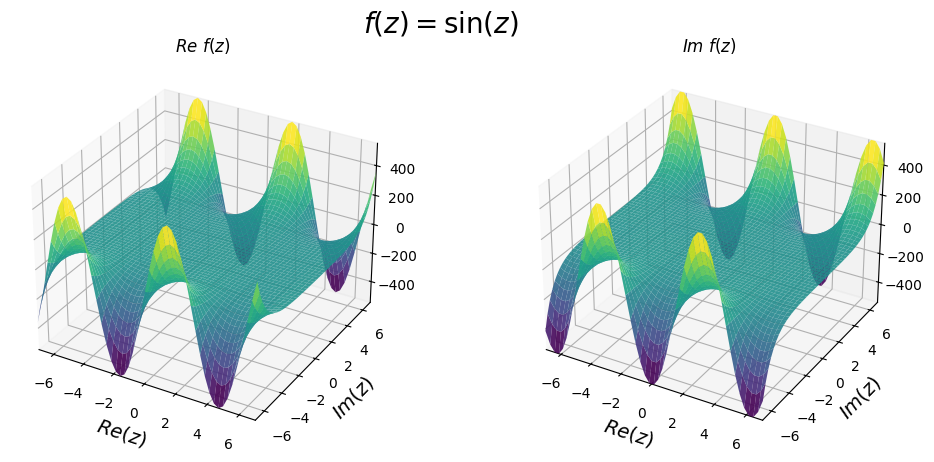

In [ ]:
N = 50
lim = 7

x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = np.sin(z)

fig = plt.figure(figsize=(12,5))
fig.suptitle("$f(z) = \sin(z)$", fontsize=20)
ax1 = fig.add_subplot(121, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim))
ax2 = fig.add_subplot(122, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim))

ax1.plot_surface(x, y, f.real, cmap="viridis", shade=True, alpha=0.9, label="Re f(z)")
ax2.plot_surface(x, y, f.imag, cmap="viridis", shade=True, alpha=0.9, label="Im f(z)")

ax1.set_zlim(f.real.min(), f.real.max())
ax1.set_xlabel("$Re(z)$", fontsize=14)
ax1.set_ylabel("$Im(z)$", fontsize=14)
ax1.set_title("$Re \,\, f(z)$") # \, adds space

ax2.set_zlim(f.imag.min(), f.imag.max())
ax2.set_xlabel("$Re(z)$", fontsize=14)
ax2.set_ylabel("$Im(z)$", fontsize=14)
ax2.set_title("$Im \,\, f(z)$")

<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-836680578.py:35: SyntaxWarning: invalid escape sequence '\p'
  legend_elements = [Line2D([0], [0], marker='o', color='cyan', label='$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),


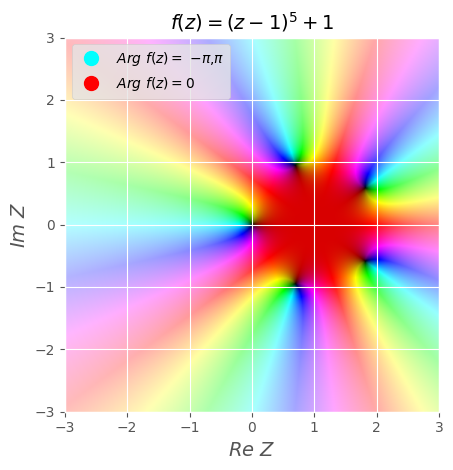

In [ ]:
from colorsys import hls_to_rgb


def colorize(fz):

    """
    The original colorize function can be found at:
    https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
    by the user nadapez.
    """

    r = np.log2(1. + np.abs(fz))

    h = np.angle(fz)/(2*np.pi)
    l = 1 - 0.45**(np.log(1+r))
    s = 1

    c = np.vectorize(hls_to_rgb)(h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (m,n,3)
    c = np.rot90(c.transpose(2,1,0), 1) # Change shape to (m,n,3) and rotate 90 degrees

    return c


N = 500
lim = 3
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = (z-1)**5+1


from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='cyan', label='$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),
                   Line2D([0], [0], marker='o', color='red', label='$Arg$ $f(z)=0$', markersize=10, lw=0)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title(r"$f(z)=(z-1)^5+1$", fontsize=14)

plt.tight_layout()

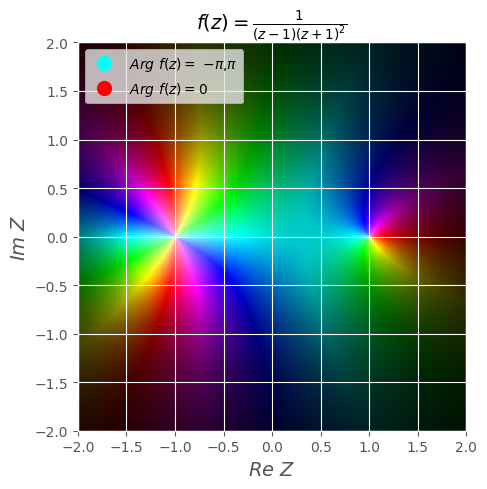

In [ ]:
lim = 2
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y

f = 1/((z-1)*(z+1)**2)

fig, ax = plt.subplots(figsize=(5,5))
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title(r"$f(z)=\frac{1}{(z-1)(z+1)^2}$", fontsize=14)

plt.tight_layout()